In [62]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv(Path('./cleaned.csv'))
df.head()

,fancyname,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,low_price_item,top_price_item,price,paidapp,rating,numberreviews,cleaned_numberReviews
0,Online Soccer Manager (OSM),gamebasics bv,1.0,1.0,0.0,0.0,0.0,1.0,1,everyone,0.0,10000000.0,sports,0.59,109.99,free,0.0,4.5,"1,656,120",1656120
1,Hungry Shark Evolution,ubisoft entertainment,1.0,1.0,0.0,0.0,0.0,0.0,1,16+,0.0,100000000.0,arcade,2.29,109.99,free,0.0,4.5,"6,495,234",6495234
2,Zynga Poker ? Free Texas Holdem Online Card Games,zynga,1.0,1.0,1.0,0.0,0.0,1.0,1,12+,0.0,50000000.0,casino,0.59,350.00,free,0.0,4.5,"2,315,552",2315552
3,Sudoku - The Clean One,dustland design,1.0,1.0,0.0,0.0,0.0,0.0,1,everyone,0.0,1000000.0,puzzle,1.89,2.99,free,0.0,4.6,"6,639",6639
4,8 Ball Pool,miniclip.com,1.0,1.0,0.0,0.0,0.0,0.0,1,everyone,0.0,500000000.0,sports,0.79,99.99,free,0.0,4.5,"17,053,699",17053699


In [14]:
ColumnsToDrop = [
    'Downloads',
    'fancyname',
    'company',
    'low_price_item',
    'top_price_item',
    'price',
    'numberreviews',
    'cleaned_numberReviews',
    'game'
]
df_selectedColumns = df.drop(ColumnsToDrop,axis=1)
df_selectedColumns

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,age_rating,Parentalguidance,categorygame,paidapp,rating
0,1.0,1.0,0.0,0.0,0.0,1.0,everyone,0.0,sports,0.0,4.5
1,1.0,1.0,0.0,0.0,0.0,0.0,16+,0.0,arcade,0.0,4.5
2,1.0,1.0,1.0,0.0,0.0,1.0,12+,0.0,casino,0.0,4.5
3,1.0,1.0,0.0,0.0,0.0,0.0,everyone,0.0,puzzle,0.0,4.6
4,1.0,1.0,0.0,0.0,0.0,0.0,everyone,0.0,sports,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,0.0,0.0,0.0,0.0,0.0,everyone,0.0,puzzle,0.0,4.2
7901,0.0,0.0,0.0,0.0,0.0,0.0,7+,0.0,strategy,1.0,3.9
7902,1.0,0.0,0.0,0.0,0.0,0.0,7+,0.0,adventure,0.0,3.9
7903,NaN,NaN,NaN,NaN,NaN,NaN,no info,0.0,board,0.0,4.3


In [15]:
#X = df['purchases','ads','sharesinfo','shareslocation','']
df_encoded = pd.get_dummies(df_selectedColumns, columns=['age_rating', 'categorygame'])

In [16]:
df_encoded

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,Parentalguidance,paidapp,rating,age_rating_12+,...,categorygame_educational,categorygame_music,categorygame_puzzle,categorygame_racing,categorygame_role playing,categorygame_simulation,categorygame_sports,categorygame_strategy,categorygame_trivia,categorygame_word
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.5,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,0,...,0,0,1,0,0,0,0,0,0,0
7901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0,...,0,0,0,0,0,0,0,1,0,0
7902,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,0,...,0,0,0,0,0,0,0,0,0,0
7903,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.3,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_encoded_nonNA = df_encoded.dropna()

In [33]:
X = df_encoded_nonNA.drop('rating',axis=1)
y = df_encoded_nonNA['rating']

In [35]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(7023,)


In [58]:
def accuracy_score_homebrew(yPred, y):
    if(len(yPred) == len(y)):
        diffs = []
        for idx, predVal in enumerate(yPred):
            #print(f"{idx}, {predVal}, {y[idx]}")
            diffs.append(abs(y[idx] - predVal))
            
        #print(diffs)
        return sum(diffs) / len(diffs)
        
    else:
        return null

In [59]:
accuracy_score_homebrew(y_pred, y.tolist())

0.28502009371551384

In [63]:
r2_score(y, y_pred)

0.11041577197689212

In [55]:
y_pred[7013:]

array([4.02746582, 4.30932617, 4.30932617, 4.03515625, 4.31164551,
       4.1739502 , 4.4017334 , 4.22741699, 4.2166748 , 4.2364502 ])

ValueError: x and y must be the same size

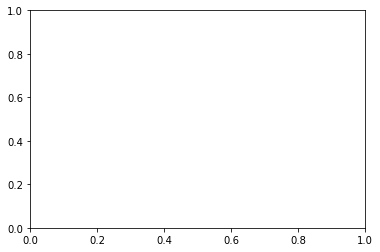

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()